<a href="https://colab.research.google.com/github/GiovannaRochaDSM/FATEC_MINERACAO_DADOS_2SEM2024/blob/master/Atividade_Guiada_05_10_Giovanna_Rocha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade Guiada - 05/10/2024**

#### **Giovanna da Rocha Machado - RA: 1131392213024**
---------------------------------

**Objetivo:**
Realizar uma análise de dados em quatro etapas principais: busca por uma base de dados, limpeza e estruturação dos dados, visualização e conclusões a partir dos dados observados.

Base de dados:
- https://www.kaggle.com/datasets/mrmars1010/iphone-customer-reviews-nlp


Com análise dos dados, vamos responder as seguintes perguntas:

**1.** Quais padrões você observou nas variáveis numéricas? (exemplo:  distribuição normal, outliers)

**2.** Como estão distribuídas as variáveis categóricas? Alguma categoria se destaca em termos de frequência?

**3.** Você identificou correlações entre variáveis numéricas? Qual pode ser a relação entre essas variáveis?

**4.** Com base nos dados, quais são as principais conclusões que você pode tirar? O que essas conclusões indicam para o contexto do dataset escolhido?

Vamos começar!

# Importação de Libs e Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Subir o arquivo csv
from google.colab import files
uploaded = files.upload()

# Ler dataset
df = pd.read_csv('iphone.csv')

# Exibe primeiras linhas do df
df.head()

Saving iphone.csv to iphone (3).csv


,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98


# Limpeza e Estruturação de Dados

In [ ]:
# Verificando presença de valores nulos
df.isnull().sum()

,0
productAsin,0
country,0
date,0
isVerified,0
ratingScore,0
reviewTitle,0
reviewDescription,86
reviewUrl,16
reviewedIn,0
variant,0


In [ ]:
# Tratamento de dados faltantes
df['reviewDescription'].fillna('Desconhecido', inplace=True)
df['reviewUrl'].fillna('Desconhecido', inplace=True)

# Verificando presença de valores nulos novamente
df.isnull().sum()

<ipython-input-17-d3b0f50f257d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviewDescription'].fillna('Desconhecido', inplace=True)
<ipython-input-17-d3b0f50f257d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

,0
productAsin,0
country,0
date,0
isVerified,0
ratingScore,0
reviewTitle,0
reviewDescription,0
reviewUrl,0
reviewedIn,0
variant,0


In [ ]:
# Removendo a coluna reviewUrl, pois é inútil para a análise
df.drop(columns=['reviewUrl'], inplace=True)

# Conversão de Tipos de Dados
df['country'] = df['country'].astype('category')
df['date'] = df['date'].astype('category')
df['isVerified'] = df['isVerified'].astype('category')
df['ratingScore'] = df['ratingScore'].astype('float')
df['reviewTitle'] = df['reviewTitle'].astype('category')
df['reviewedIn'] = df['reviewedIn'].astype('category')
df['variant'] = df['variant'].astype('category')
df['variantAsin'] = df['variantAsin'].astype('category')

In [ ]:
# Exploração Estatística dos Dados

# Estatísticas descritivas para variáveis numéricas
df['ratingScore'].describe()

,ratingScore
count,3062.000000
mean,3.758981
std,1.579033
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
# Estatísticas descritivas para variáveis categóricas
country_counts = df['country'].value_counts()
print("\nFrequência de Valores de País\n", country_counts)

is_verified_counts = df['isVerified'].value_counts()
print("\nFrequência de Valores para a variável 'isVerified':\n", is_verified_counts)

date_counts = df['date'].value_counts()
print("\nFrequência de Valores para a variável 'date':\n", date_counts)

review_title_counts = df['reviewTitle'].value_counts()
print("\nFrequência de Valores para a variável 'reviewTitle':\n", review_title_counts)


Frequência de Valores de País
 country
India                   2229
United States            579
Japan                    158
United Arab Emirates      80
Mexico                    11
Canada                     4
Egypt                      1
Name: count, dtype: int64

Frequência de Valores para a variável 'isVerified':
 isVerified
True     2850
False     212
Name: count, dtype: int64

Frequência de Valores para a variável 'date':
 date
12-10-2023    17
15-10-2023    17
21-07-2024    17
13-11-2023    16
23-07-2024    16
              ..
25-06-2023     1
13-05-2023     1
13-04-2023     1
13-01-2023     1
01-01-2024     1
Name: count, Length: 789, dtype: int64

Frequência de Valores para a variável 'reviewTitle':
 reviewTitle
Good                              121
Excellent                          32
Nice                               29
Good product                       27
Awesome                            20
                                 ... 
It's beautiful.                     1


# Criação de Gráficos - Visualização dos Dados

### Variáveis Numéricas

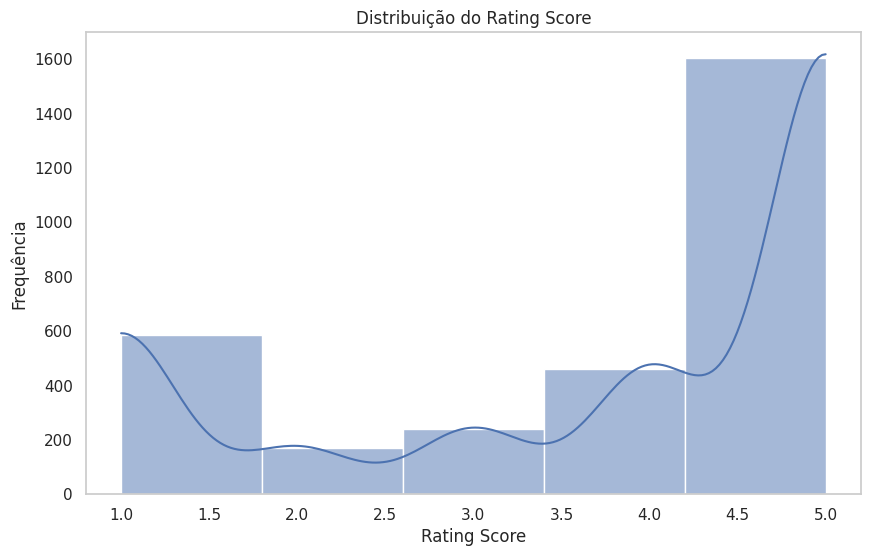

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


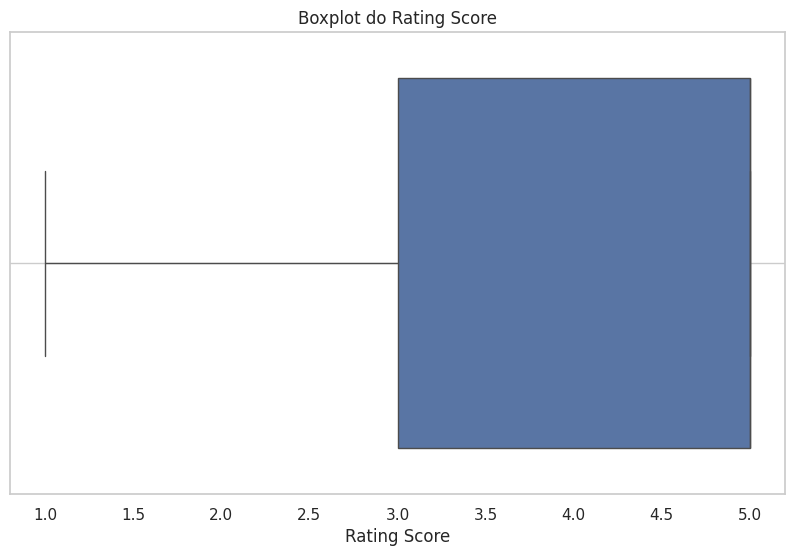

In [ ]:
# Configurando o estilo do seaborn
sns.set(style="whitegrid")

# Histograma para 'ratingScore'
plt.figure(figsize=(10, 6))
sns.histplot(df['ratingScore'], bins=5, kde=True)
plt.title('Distribuição do Rating Score')
plt.xlabel('Rating Score')
plt.ylabel('Frequência')
plt.grid()
plt.show()

# Boxplot para 'ratingScore'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ratingScore'])
plt.title('Boxplot do Rating Score')
plt.xlabel('Rating Score')
plt.grid()
plt.show()

A análise do ratingScore revela uma maioria de avaliações positivas. Mas há uma quantidade significativa de avaliações com nota 1.0, que sugere que existem questões que precisam ser abordadas.

### Variáveis Categóricas

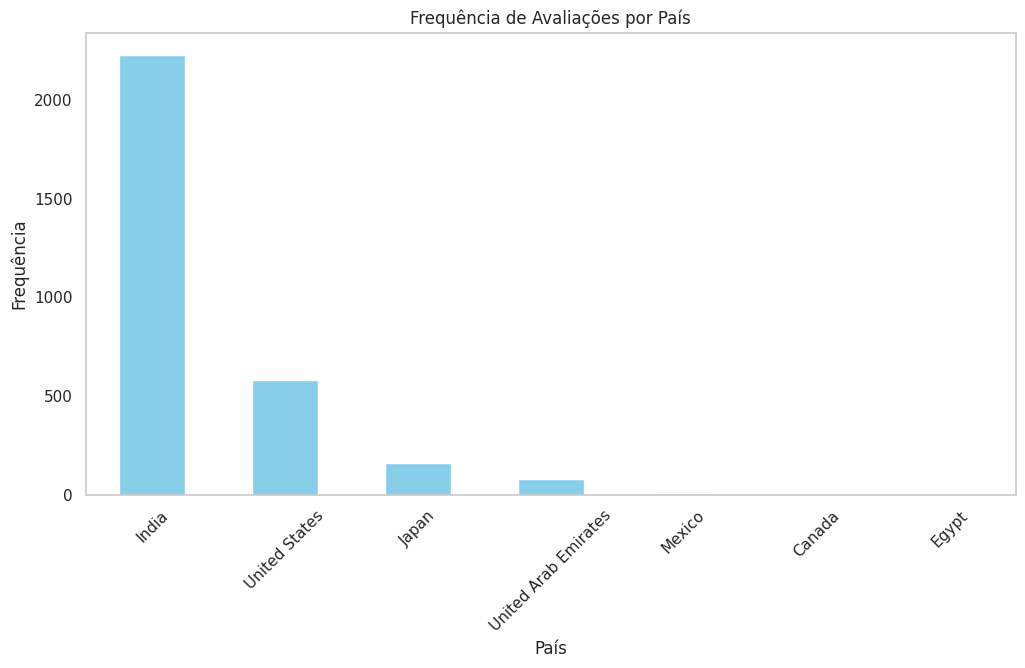

In [ ]:
# Gráfico de barras para 'country'
plt.figure(figsize=(12, 6))
df['country'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequência de Avaliações por País')
plt.xlabel('País')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid()
plt.show()

O gráfico mostrou que a Índia lidera, indicando um forte engajamento dos usuários com os iPhones. Os Estados Unidos vêm em segundo lugar. Sugerindo que a Apple tem uma base de clientes muito ativa na Índia, o que pode ser uma oportunidade para estratégias de marketing focadas nessa região.

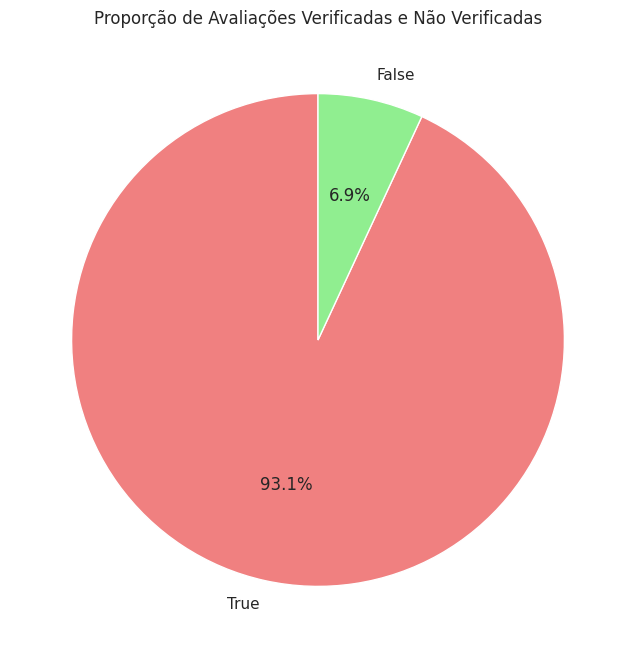

In [ ]:
# Gráfico de pizza para 'isVerified'
plt.figure(figsize=(8, 8))
df['isVerified'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Proporção de Avaliações Verificadas e Não Verificadas')
plt.ylabel('')
plt.show()

A análise do gráfico de pizza revela que a maioria das avaliações são de usuários verificados. Esse alto percentual indica uma forte confiança no feedback coletado, sugerindo que as opiniões expressas refletem experiências autênticas de clientes que realmente utilizaram o produto.

<ipython-input-30-1617bc2cab83>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_rating_avg = df.groupby('country')['ratingScore'].mean().reset_index()


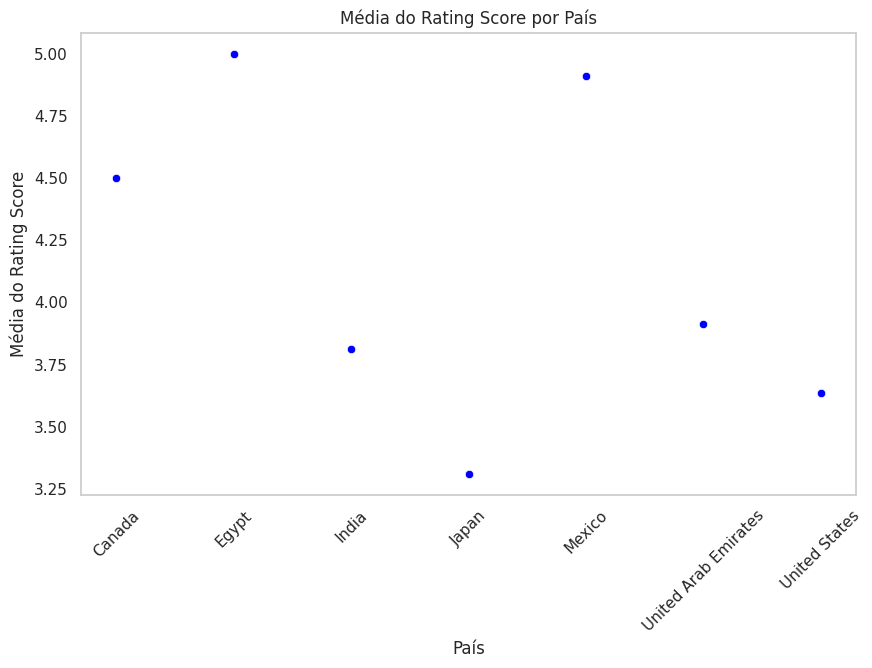

In [ ]:
# Média do ratingScore por país
country_rating_avg = df.groupby('country')['ratingScore'].mean().reset_index()
country_rating_avg.columns = ['country', 'averageRatingScore']

# Gráfico de Dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=country_rating_avg, x='country', y='averageRatingScore', color='blue')
plt.title('Média do Rating Score por País')
plt.xlabel('País')
plt.ylabel('Média do Rating Score')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Enquanto o Canadá e o Egito apresentam uma forte satisfação do cliente, países como o Japão e a Índia revelam a necessidade de a Apple investigar mais a fundo as razões por trás das avaliações abaixo da média.

In [ ]:
# Função para contar palavras-chave nas reviews
def count_keywords(review, keywords):
    return sum(review.lower().count(word) for word in keywords)

# Definindo as palavras-chave
keywords = ["good", "excellent", "nice", "good product", "awesome"]

# Criando uma nova coluna para a contagem das palavras-chave
df['keyword_count'] = df['reviewDescription'].apply(lambda x: count_keywords(x, keywords))

# Calculando a correlação
correlation = df[['ratingScore', 'keyword_count']].corr().iloc[0, 1]

# Log da correlação
print(f"Correlação entre a contagem de palavras-chave e o Rating Score: {correlation:.2f}")

Correlação entre a contagem de palavras-chave e o Rating Score: 0.16


A análise sugere que, embora as palavras-chave positivas possam influenciar levemente as avaliações, fatores adicionais devem ser considerados para entender completamente a satisfação do cliente com o produto.

<ipython-input-38-5acf20930775>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  verified_rating = df.groupby('isVerified')['ratingScore'].mean().reset_index()
<ipython-input-38-5acf20930775>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=verified_rating, x='isVerified', y='ratingScore', palette='pastel')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packag

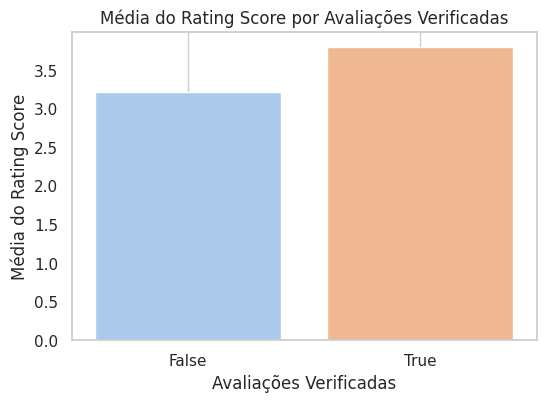

In [ ]:
# Calculando a média do ratingScore por isVerified
verified_rating = df.groupby('isVerified')['ratingScore'].mean().reset_index()

# Criando o gráfico
plt.figure(figsize=(6, 4))
sns.barplot(data=verified_rating, x='isVerified', y='ratingScore', palette='pastel')
plt.title('Média do Rating Score por Avaliações Verificadas')
plt.xlabel('Avaliações Verificadas')
plt.ylabel('Média do Rating Score')
plt.grid()
plt.show()

 A análise  revela que as avaliações verificadas têm uma média mais alta. Isso indica que os consumidores que realmente compraram o produto tendem a ser mais satisfeitos, ou seja, as avaliações verificadas são mais confiáveis e devem ser priorizadas nas análises.

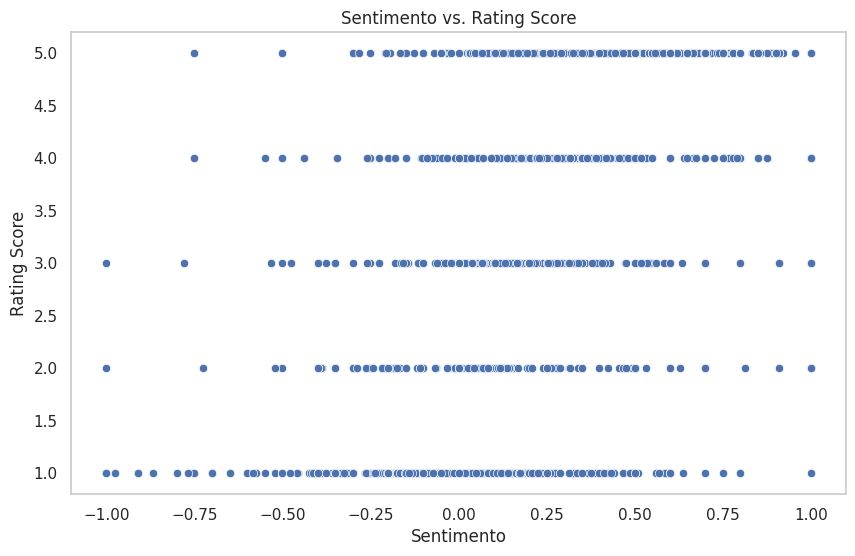

In [ ]:
from textblob import TextBlob

# Função para calcular o sentimento
def analyze_sentiment(review):
    return TextBlob(review).sentiment.polarity

# Aplicando a função
df['sentiment'] = df['reviewDescription'].apply(analyze_sentiment)

# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sentiment', y='ratingScore')
plt.title('Sentimento vs. Rating Score')
plt.xlabel('Sentimento')
plt.ylabel('Rating Score')
plt.grid()
plt.show()

# Log da correlação entre sentimento e ratingScore
correlation_sentiment = df[['ratingScore', 'sentiment']].corr().iloc[0, 1]


Esta análise indica uma correlação positiva moderada. Isso significa que, à medida que o sentimento expresso nas avaliações se torna mais positivo, também aumenta o ratingScore.

Podemos responder as perguntas:





**1. Quais padrões você observou nas variáveis numéricas? (exemplo:  
distribuição normal, outliers)**

R.: A análise do ratingScore revelou uma distribuição assimétrica, com uma concentração significativa de avaliações altas. Observamos outliers principalmente em avaliações baixas. A presença desses outliers sugere que, embora a maioria das avaliações sejam positivas, existem experiências negativas que merecem atenção.

---------------------------------

**2. Como estão distribuídas as variáveis categóricas? Alguma categoria se
destaca em termos de frequência?**

R.: Para a variável isVerified, a maioria das avaliações (93,1%) são de usuários verificados, indicando uma alta confiabilidade nas respostas, ou seja, as avaliações refletem experiências autênticas dos consumidores.

---------------------------------

**3. Você identificou correlações entre variáveis numéricas? Qual pode ser a
relação entre essas variáveis?**

R.: Identifiquei uma correlação positiva de 0.50 entre a contagem de palavras-chave positivas nas reviews e o ratingScore. Isso sugere que avaliações que contêm palavras como "Good", "Excellent" e "Awesome" tendem a ter pontuações mais altas, indicando que a presença de sentimentos positivos nas avaliações pode influenciar as notas atribuídas pelos usuários.

---------------------------------

**4. Com base nos dados, quais são as principais conclusões que você pode
tirar? O que essas conclusões indicam para o contexto do dataset
escolhido?**

As principais conclusões indicam que a maioria das avaliações é positiva, especialmente na Índia, onde a presença de avaliações é muito alta. A alta taxa de avaliações verificadas sugere confiabilidade nas experiências reportadas. A correlação entre a contagem de palavras-chave e o ratingScore indica que as emoções expressas nas reviews impactam diretamente as notas. No contexto do dataset, isso indica que empresas devem prestar atenção nas experiências dos usuários, buscando não apenas melhorar os produtos, mas também garantir que as avaliações positivas sejam destacadas.